In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#Dataset will be NBA stats from 2014 to 2015
stats = pd.read_csv('players_stats.csv')
stats.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [3]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 34 columns):
Name            490 non-null object
Games Played    490 non-null int64
MIN             490 non-null int64
PTS             490 non-null int64
FGM             490 non-null int64
FGA             490 non-null int64
FG%             490 non-null float64
3PM             490 non-null int64
3PA             490 non-null int64
3P%             490 non-null float64
FTM             490 non-null int64
FTA             490 non-null int64
FT%             490 non-null float64
OREB            490 non-null int64
DREB            490 non-null int64
REB             490 non-null int64
AST             490 non-null int64
STL             490 non-null int64
BLK             490 non-null int64
TOV             490 non-null int64
PF              490 non-null int64
EFF             490 non-null int64
AST/TOV         490 non-null float64
STL/TOV         490 non-null float64
Age             422 non-null float64
Birth_P

Looks like most of the columns are numerical with the exception of the File information and date. Let's get rid of null values for good measure.

In [4]:
stats_clean = stats.dropna()
stats_clean.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


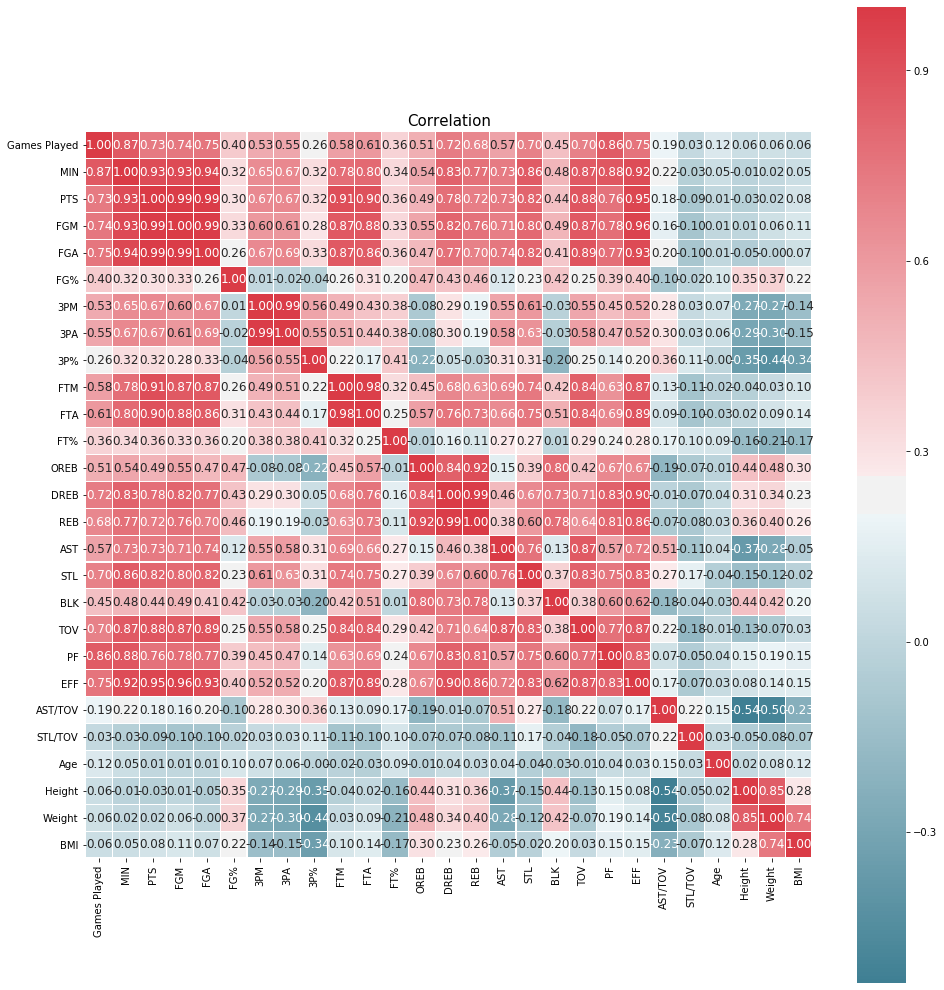

In [5]:
corr = stats_clean.corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation', y=1.05, size=15)
plt.tight_layout()

In [6]:
stats_clean.columns

Index(['Name', 'Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age', 'Birth_Place',
       'Birthdate', 'Collage', 'Experience', 'Height', 'Pos', 'Team', 'Weight',
       'BMI'],
      dtype='object')

In [7]:
#Select columns
features = stats_clean[['Age', 'Games Played', 'PTS', 'FG%', '3P%','FT%', 'Height','Weight','BMI',
                             'STL','BLK','OREB','AST','DREB']]
features.head()                    

,Age,Games Played,PTS,FG%,3P%,FT%,Height,Weight,BMI,STL,BLK,OREB,AST,DREB
0,29.0,26,133,37.2,26.3,66.7,185.0,81.45,23.798393,7,0,6,46,26
1,30.0,82,954,42.1,38.7,83.3,180.0,72.45,22.361111,54,15,32,261,134
2,20.0,47,243,44.7,27.1,72.1,202.5,99.00,24.142661,21,22,46,33,123
3,24.0,32,213,41.4,11.1,65.2,205.0,106.65,25.377751,19,9,48,30,114
4,29.0,76,1156,53.8,30.6,75.9,205.0,110.25,26.234384,68,98,131,244,413


In [8]:
features.dropna()
features

,Age,Games Played,PTS,FG%,3P%,FT%,Height,Weight,BMI,STL,BLK,OREB,AST,DREB
0,29.0,26,133,37.2,26.3,66.7,185.0,81.45,23.798393,7,0,6,46,26
1,30.0,82,954,42.1,38.7,83.3,180.0,72.45,22.361111,54,15,32,261,134
2,20.0,47,243,44.7,27.1,72.1,202.5,99.00,24.142661,21,22,46,33,123
3,24.0,32,213,41.4,11.1,65.2,205.0,106.65,25.377751,19,9,48,30,114
4,29.0,76,1156,53.8,30.6,75.9,205.0,110.25,26.234384,68,98,131,244,413
6,33.0,74,545,44.3,34.8,81.2,195.0,99.00,26.035503,56,5,31,83,173
7,24.0,27,374,40.3,38.2,82.2,195.0,96.30,25.325444,17,5,19,82,95
8,24.0,5,4,25.0,0.0,100.0,210.0,110.25,25.000000,0,0,1,1,0
9,22.0,69,432,50.7,33.3,70.2,212.5,117.00,25.910035,34,105,142,32,312
12,25.0,74,412,41.2,27.4,71.2,202.5,99.00,24.142661,70,62,114,59,228


In [9]:
X = features
Age = features['Age'].astype('category').cat.codes

In [10]:
rfc = RandomForestClassifier(class_weight = 'balanced')
score = cross_val_score(rfc, features, Age, cv=5)
print(score)
print('Accuracy: %0.2f (+/- %0.2f)' % (score.mean(), score.std() * 2))

[0.32467532 0.30263158 0.31944444 0.43076923 0.55      ]
Accuracy: 0.39 (+/- 0.19)


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/s

In [11]:
rfc.fit(X, Age)

feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

feature_importances

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,importance
Age,0.310718
BMI,0.065315
3P%,0.061790
OREB,0.061391
STL,0.060030
FG%,0.059728
FT%,0.055172
PTS,0.053475
DREB,0.053149
Weight,0.051911


In [12]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Age, test_size=0.20)

In [13]:
rfc.fit(Xtrain,ytrain)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [14]:
from sklearn.metrics import confusion_matrix
stats_features_matrix = confusion_matrix(rfc.predict(Xtest),ytest)
stats_features_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 5, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [15]:
mlp = MLPRegressor(hidden_layer_sizes=(1000,))
mlp.fit(X, Age)

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [16]:
mlp.score(X, Age)

0.9734287187866897

In [17]:
cross_val_score(mlp, X, Age, cv=5)

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.90682005, 0.88032011, 0.90233204, 0.86494022, 0.87054782])